## Importing neessory Libraries

In [46]:
# Data manipulation and analysis on dataframes
import pandas as pd 
import numpy as np 

#Data Visualisation Library
import matplotlib.pyplot as plt

#Non-negative Matrix Factorization Library
from sklearn.decomposition import NMF

#Unsupervised ML libraries for clustering
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors


### Loading the dataframe

In [2]:
df = pd.read_csv('spotify.xls',index_col=0)
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


# EDA (Exploratory Data Analysis)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, user_1 to user_1000
Columns: 5000 entries, song_1 to song_5000
dtypes: int64(5000)
memory usage: 38.2+ MB


## Non Negative Matrix Factorization

In [4]:
x = df.values

In [5]:
nmf = NMF(n_components=100, max_iter=1000, random_state=100) # n_comp - features, max_itr - # of iteration allowed, random_state for shuffling

In [6]:
nmf.fit(x)
user_matrix = nmf.transform(x)
song_matrix = nmf.components_.T

C:\Users\Mahesh\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\Mahesh\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


In [7]:
user_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.84533542, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.63945089, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.33751685, 0.        , ..., 3.14601071, 0.        ,
        0.        ],
       [0.        , 1.12147873, 0.        , ..., 0.        , 0.40783907,
        1.47084396],
       [0.72454542, 1.81791399, 0.13795083, ..., 0.52178048, 0.        ,
        0.        ]])

In [8]:
song_matrix

array([[0.13281758, 0.1474877 , 0.        , ..., 0.22845059, 0.19561522,
        0.23372763],
       [0.22575796, 0.        , 0.48204324, ..., 0.16088125, 0.06590065,
        0.08401945],
       [0.2610321 , 0.        , 0.02409176, ..., 0.65954439, 0.23477369,
        0.16624549],
       ...,
       [0.26699177, 0.23706928, 0.14580404, ..., 0.10532991, 0.4363255 ,
        0.31363757],
       [0.        , 0.24150991, 0.17487193, ..., 0.34798278, 0.06774254,
        0.        ],
       [0.13206822, 0.        , 0.01791898, ..., 0.27922375, 0.16782685,
        0.30997385]])

In [9]:
user_matrix.shape

(1000, 100)

In [10]:
song_matrix.shape

(5000, 100)

## Steps for building Recommendation system
- Type 1 (small Datasets) :
  1. consider recommending song to the first user in the user metrics
  2. find eclidean distance between the first user and remaining 999 user
  3. find out top 10 song heard nearest 5 users 
  4. recommend this 10 song to fist user

Calculating the distance :

In [11]:
def col_dist(u1,u2):
    return pow(sum(pow(u1[x] - u2[x],2) for x in range(len(u1))),0.5)

In [12]:
col_dist(user_matrix[0],user_matrix[1])

12.962015431633573

Calculating the ditance between remaining 999 users

In [13]:
def distance_from_remaining_user(b_user,user_matrix):
    dist = []
    for i in range(len(user_matrix)):
        if b_user  != i:
            dist.append(col_dist(user_matrix[b_user],user_matrix[i]))
    return dist

In [14]:
distance_for_user1 = distance_from_remaining_user(49,user_matrix)

In [15]:
distance_for_user1

[13.373330506247523,
 12.362053045796802,
 14.57134508734674,
 13.174730115215313,
 14.102539871556871,
 13.580114375948297,
 14.10372257351302,
 13.664255746520402,
 14.99495434805624,
 12.297160351152499,
 11.241488314536655,
 13.620132975268948,
 13.093783929786182,
 13.907492765691652,
 14.030032235493266,
 11.429836687388667,
 13.93169155876247,
 13.741956038203092,
 13.65406892360263,
 12.45933998838023,
 13.466265084972445,
 14.222268336012423,
 13.282175626692684,
 14.061480559229002,
 14.622509403347296,
 14.494435726229343,
 13.043716440677343,
 12.404275706045135,
 14.831730643312714,
 13.11718114843422,
 12.699755113409699,
 13.532683862428277,
 15.837673255614625,
 13.04619431562962,
 12.125203151272345,
 14.449362088306406,
 13.92422522643907,
 14.93739118055804,
 14.426919965930947,
 15.118422526579172,
 13.337545333384599,
 14.305413135749113,
 13.572758783155582,
 13.77489126948831,
 12.86789639075573,
 11.913915179694994,
 12.599731847232073,
 13.088094813686011,
 12.

In [16]:
len(distance_for_user1)

999

Finding Nearest 5 Users

In [17]:
nearest_user = np.argsort(distance_for_user1)[:10]

In [18]:
nearest_user

array([776, 179, 759, 692, 723, 881, 243, 351, 996,  10], dtype=int64)

Finding the songs heard by nearest 5 users

In [19]:
df.iloc[[776.,179]]

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_777,9,1,8,5,15,11,13,0,14,7,...,4,9,15,1,14,12,8,1,13,8
user_180,11,1,6,4,9,10,0,6,9,11,...,14,12,13,10,5,0,0,7,10,7


In [20]:
for i in nearest_user:
    print('songs heard by user', i,'are: ')
    temp = df.iloc[i]
    print(temp[temp.values != 0].index)

songs heard by user 776 are: 
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4685)
songs heard by user 179 are: 
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_8',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4989', 'song_4990', 'song_4991', 'song_4992', 'song_4993',
       'song_4994', 'song_4995', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4646)
songs heard by user 759 are: 
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4990', 'song_4991', 'song_4992', 'song_4993', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', le

Finding top 10 stong heard by nearest users

In [21]:
def top_n_song(nearest_user,df):
    temp = df.iloc[nearest_user]
    dict1 = temp.max().to_dict()
    #converting every jey value pair into a tuple and swapping them for sorting purpose. end result is list
    # sing and number of times heard tuple
    sorted_dict = sorted(dict1.items(), key =  lambda keyvalue : (keyvalue[1],keyvalue[0]),reverse=True)[:8]
    #print(sorted_dict)
    return [x[0] for x in sorted_dict]

In [22]:
top_n_song(nearest_user,df)

['song_997',
 'song_996',
 'song_995',
 'song_993',
 'song_991',
 'song_989',
 'song_988',
 'song_984']

## Type 2 Recommendation System
  1. Use KMeans Clustering to create cluster of songs in same genre.
  2. Recommend songs to any user by finding out the most heard(top 10) songs in that user's cluster.

In [25]:
wcss = {}
for k in range(1,51):
    kmeans = KMeans(n_clusters=k,max_iter=1000,random_state=42)
    kmeans.fit(song_matrix)
    wcss[k] = kmeans.inertia_

In [26]:
print(wcss)

{1: 14169.227673045967, 2: 13990.163724311818, 3: 13855.967999384318, 4: 13746.501116883594, 5: 13658.524532844229, 6: 13590.002845541498, 7: 13532.811765489681, 8: 13478.507437658782, 9: 13431.26539788545, 10: 13390.902033371109, 11: 13352.447538234303, 12: 13317.472914297494, 13: 13288.982252410793, 14: 13261.081731814065, 15: 13232.99112750995, 16: 13206.900608574477, 17: 13184.310151549735, 18: 13176.066798946806, 19: 13151.962190455295, 20: 13129.111166454757, 21: 13105.969353479053, 22: 13080.815293627495, 23: 13076.207056495425, 24: 13065.056599549362, 25: 13038.533291571737, 26: 13026.771135014564, 27: 13012.1812670506, 28: 12997.826048551216, 29: 12985.006874824592, 30: 12959.578861283853, 31: 12945.416862922364, 32: 12941.633841797215, 33: 12925.786536650614, 34: 12911.027054055065, 35: 12892.55565254864, 36: 12883.967720522698, 37: 12870.430916272513, 38: 12857.706877532615, 39: 12849.871194159901, 40: 12843.395839852039, 41: 12822.260630506313, 42: 12818.010311909642, 43: 1

Text(0, 0.5, 'within cluster sum of square')

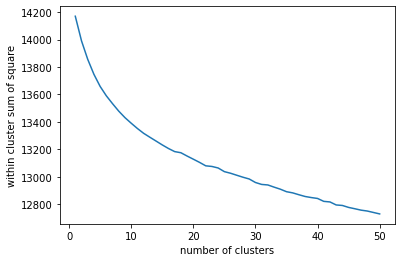

In [29]:
plt.plot(wcss.keys(),wcss.values())
plt.xlabel('number of clusters')
plt.ylabel('within cluster sum of square')

Creating Kmeans clustering model and recommending songs using the same.

In [51]:
def recommend_songs(n_clusters,df,song_matrix,song_name,n_recommendation):
    kmeans = KMeans(n_clusters = n_clusters,max_iter= 1000,random_state=42).fit(song_matrix)
    index_in_song = df.columns.to_list().index(song_name)
    #print(index_in_song)
    song_vector = song_matrix[index_in_song]
    #print(song_vector)
    all_songs_in_cluster = kmeans.predict(song_matrix)
    #print(all_songs_in_cluster)
    #finding songs in the same cluster as of song_n
    songs_in_selected_cluster = [x for x in range(len(all_songs_in_cluster))
                                if all_songs_in_cluster[x] == kmeans.predict([song_vector])]
    #print(len(songs_in_selected_cluster))
    #Finding song vectors of the songs in the same cluster
    song_cluster = song_matrix[songs_in_selected_cluster]
    #print(song_cluster)
    neighbors = NearestNeighbors(n_neighbors= n_recommendation)
    neighbors.fit(song_cluster)
    recommended_songs = neighbors.kneighbors([song_matrix[index_in_song]])
    #print(recommended_songs)
    songs = df.columns
    return [songs[x] for x in recommended_songs[1][0]]
    
                                 

In [53]:
recommend_songs(15,df,song_matrix,'song_249',10)

['song_18',
 'song_379',
 'song_251',
 'song_53',
 'song_316',
 'song_134',
 'song_99',
 'song_234',
 'song_138',
 'song_290']